In [10]:
import torch
from torch import nn
from torch import optim
from torch.utils.data import TensorDataset, DataLoader 


train_x = torch.FloatTensor([
    [1, 2], [2, 3], [3, 4], [4, 5], [5, 6], [6, 7]
])
train_y = torch.FloatTensor([
    [0.1, 1.5], [1, 2.8], [1.9, 4.1], [2.8, 5.4], [3.7, 6.7], [4.6, 8]
])

In [11]:
train_dataset = TensorDataset(train_x, train_y)
train_dataloader = DataLoader(train_dataset, batch_size=2, shuffle=True, drop_last=True)

In [12]:
model = nn.Linear(2, 2, bias=True)
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.001)

In [13]:
for epoch in range(20000):
    cost = 0.0
    
    for batch in train_dataloader:
        x, y = batch
        output = model(x)
        
        loss = criterion(output, y)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        cost += loss

    cost = cost / len(train_dataloader)
    
    if (epoch + 1) % 1000 == 0:
        print(f"Epoch : {epoch+1:4d}, Model : {list(model.parameters())}, Cost : {cost:.3f}")

Epoch : 1000, Model : [Parameter containing:
tensor([[0.7452, 0.0700],
        [0.3754, 0.9020]], requires_grad=True), Parameter containing:
tensor([-0.5123, -0.6063], requires_grad=True)], Cost : 0.013
Epoch : 2000, Model : [Parameter containing:
tensor([[0.8314, 0.0253],
        [0.3984, 0.8900]], requires_grad=True), Parameter containing:
tensor([-0.6432, -0.6413], requires_grad=True)], Cost : 0.003
Epoch : 3000, Model : [Parameter containing:
tensor([[0.8753, 0.0026],
        [0.4102, 0.8839]], requires_grad=True), Parameter containing:
tensor([-0.7098, -0.6591], requires_grad=True)], Cost : 0.001
Epoch : 4000, Model : [Parameter containing:
tensor([[ 0.8977, -0.0089],
        [ 0.4162,  0.8808]], requires_grad=True), Parameter containing:
tensor([-0.7438, -0.6682], requires_grad=True)], Cost : 0.000
Epoch : 5000, Model : [Parameter containing:
tensor([[ 0.9091, -0.0148],
        [ 0.4192,  0.8793]], requires_grad=True), Parameter containing:
tensor([-0.7611, -0.6728], requires_gra

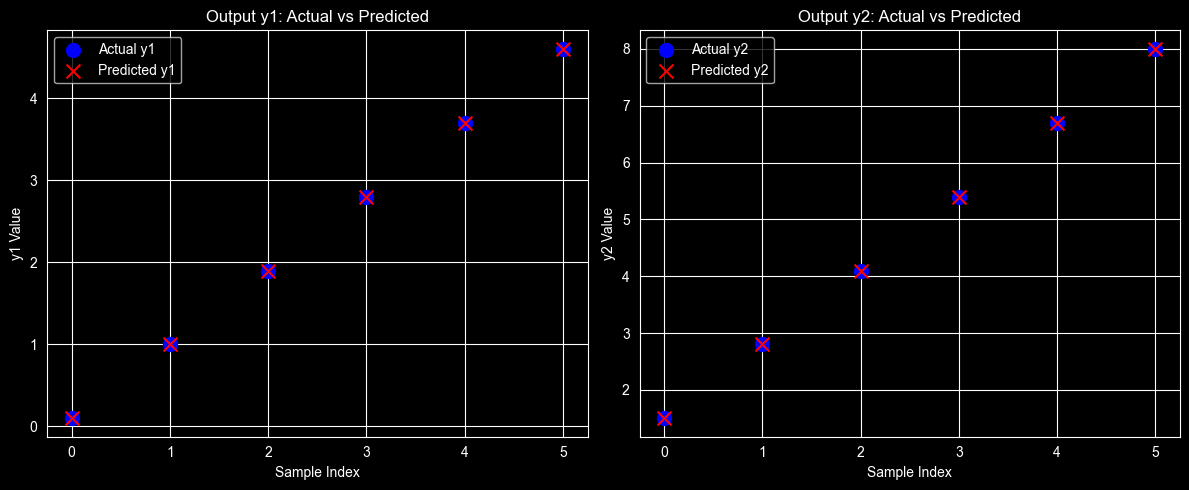


[Comparison Table]
--------------------------------------------------
Input (x1,x2)   Actual (y1,y2)     Predicted         
--------------------------------------------------
(1, 2)          (0.1, 1.5)         (0.10, 1.50)      
(2, 3)          (1.0, 2.8)         (1.00, 2.80)      
(3, 4)          (1.9, 4.1)         (1.90, 4.10)      
(4, 5)          (2.8, 5.4)         (2.80, 5.40)      
(5, 6)          (3.7, 6.7)         (3.70, 6.70)      
(6, 7)          (4.6, 8.0)         (4.60, 8.00)      


In [14]:
import matplotlib.pyplot as plt

# Prediction after training
with torch.no_grad():
    pred = model(train_x)

# Create figure with 2 subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot y1: Actual vs Predicted
axes[0].scatter(range(len(train_y)), train_y[:, 0].numpy(), label='Actual y1', color='blue', s=100)
axes[0].scatter(range(len(pred)), pred[:, 0].numpy(), label='Predicted y1', color='red', marker='x', s=100)
axes[0].set_xlabel('Sample Index')
axes[0].set_ylabel('y1 Value')
axes[0].set_title('Output y1: Actual vs Predicted')
axes[0].legend()
axes[0].grid(True)

# Plot y2: Actual vs Predicted
axes[1].scatter(range(len(train_y)), train_y[:, 1].numpy(), label='Actual y2', color='blue', s=100)
axes[1].scatter(range(len(pred)), pred[:, 1].numpy(), label='Predicted y2', color='red', marker='x', s=100)
axes[1].set_xlabel('Sample Index')
axes[1].set_ylabel('y2 Value')
axes[1].set_title('Output y2: Actual vs Predicted')
axes[1].legend()
axes[1].grid(True)

plt.tight_layout()
plt.show()

# Print comparison table
print("\n[Comparison Table]")
print("-" * 50)
print(f"{'Input (x1,x2)':<15} {'Actual (y1,y2)':<18} {'Predicted':<18}")
print("-" * 50)
for i in range(len(train_x)):
    x_val = f"({train_x[i][0]:.0f}, {train_x[i][1]:.0f})"
    y_actual = f"({train_y[i][0]:.1f}, {train_y[i][1]:.1f})"
    y_pred = f"({pred[i][0]:.2f}, {pred[i][1]:.2f})"
    print(f"{x_val:<15} {y_actual:<18} {y_pred:<18}")

TEST: Generalization Check with New Data

Input (x1,x2)   Expected             Predicted           
-------------------------------------------------------
(7, 8)          (5.5, 9.3)           (5.50, 9.30)        
(8, 9)          (6.4, 10.6)          (6.40, 10.60)       
(9, 10)         (7.3, 11.9)          (7.30, 11.90)       
(10, 11)        (8.2, 13.2)          (8.20, 13.20)       


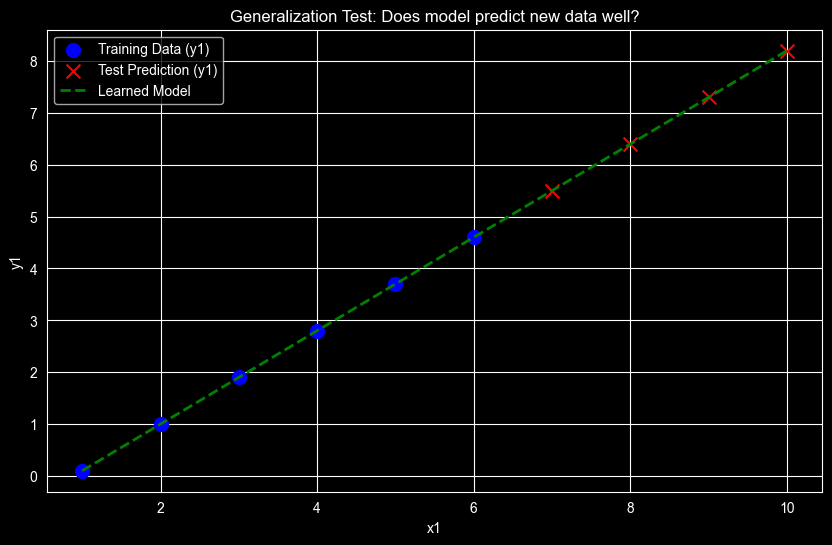


[Result]
If test predictions follow the pattern → Model generalizes well!
If test predictions are off → Model may be overfitting.


In [15]:
# Test with NEW data (not used in training)
print("=" * 55)
print("TEST: Generalization Check with New Data")
print("=" * 55)

# New data that the model has never seen
test_x = torch.FloatTensor([[7, 8], [8, 9], [9, 10], [10, 11]])

# Expected pattern from training data:
# y1 ≈ 0.9 * x1 - 0.8  (approximately)
# y2 ≈ 1.3 * x1 + 0.2  (approximately)
expected_y = torch.FloatTensor([
    [5.5, 9.3],   # (7, 8) -> expected
    [6.4, 10.6],  # (8, 9) -> expected
    [7.3, 11.9],  # (9, 10) -> expected
    [8.2, 13.2]   # (10, 11) -> expected
])

with torch.no_grad():
    test_pred = model(test_x)

print(f"\n{'Input (x1,x2)':<15} {'Expected':<20} {'Predicted':<20}")
print("-" * 55)
for i in range(len(test_x)):
    x_val = f"({test_x[i][0]:.0f}, {test_x[i][1]:.0f})"
    y_exp = f"({expected_y[i][0]:.1f}, {expected_y[i][1]:.1f})"
    y_pred = f"({test_pred[i][0]:.2f}, {test_pred[i][1]:.2f})"
    print(f"{x_val:<15} {y_exp:<20} {y_pred:<20}")

# Visualize training vs test data
plt.figure(figsize=(10, 6))

# Training data (blue)
plt.scatter(train_x[:, 0].numpy(), train_y[:, 0].numpy(), 
            color='blue', s=100, label='Training Data (y1)', marker='o')

# Test predictions (red)
plt.scatter(test_x[:, 0].numpy(), test_pred[:, 0].numpy(), 
            color='red', s=100, label='Test Prediction (y1)', marker='x')

# Draw regression line
all_x = torch.cat([train_x, test_x])
with torch.no_grad():
    all_pred = model(all_x)
sorted_idx = all_x[:, 0].argsort()
plt.plot(all_x[sorted_idx, 0].numpy(), all_pred[sorted_idx, 0].numpy(), 
         'g--', linewidth=2, label='Learned Model')

plt.xlabel('x1')
plt.ylabel('y1')
plt.title('Generalization Test: Does model predict new data well?')
plt.legend()
plt.grid(True)
plt.show()

print("\n[Result]")
print("If test predictions follow the pattern → Model generalizes well!")
print("If test predictions are off → Model may be overfitting.")